# Breast Cancer Prediction Project
This project builds a machine learning classifier to predict whether a tumor is **malignant or benign** using the **Breast Cancer Wisconsin dataset**..

The main steps include:

1. **Data Loading & Exploration:** Understand the dataset, check for missing values, and visualize features.  
2. **Data Preprocessing:** Scale features and prepare the data for modeling.  
3. **Model Training:** Train multiple classifiers including Logistic Regression, KNN, SVM, and Decision Tree.  
4. **Model Evaluation:** Compare models using training and test accuracy, confusion matrices, and classification reports.  
5. **Insights & Results:** Identify the best-performing model and important features contributing to predictions.

**Dataset:** The dataset used for this project is the [Breast Cancer Wisconsin dataset on Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).  
> Note: The built-in `sklearn.datasets.load_breast_cancer` is also used for convenience, so the notebook can run without downloading the CSV.

The goal is to demonstrate a full machine learning workflow with clean, reproducible code and clear visualizations.

## Importing Libraries
Libraries for data manipulation, visualization, and handling missing values are imported. Warnings are suppressed, and default plotting styles are set for clean visualizations.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

## Loading the Dataset
The Breast Cancer dataset is loaded into a pandas DataFrame and the first few rows are displayed to inspect its structure and understand the features.

In [39]:
df = pd.read_csv("breast_cancer_dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Initial Data Exploration

The dataset is examined to understand its structure, target column, and feature statistics:
- `.info()` confirms that all features have 569 non-null values and shows data types.
- `.unique()` reveals that the target column (`diagnosis`) contains two classes: **'M' (malignant)** and **'B' (benign)**.  
- `.describe()` provides statistical summaries for all numerical features, highlighting distributions, skewness, and potential outliers.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [44]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [46]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Summary Statistics

Basic statistics of all numerical features are examined using `df.describe()`.

Key observations:
- All features have 569 non-null values, confirming there are no missing values. 
- Many features are **right-skewed**, with means higher than medians, indicating the presence of outliers.  
- Standard deviations are relatively high for features like `area_mean` and `perimeter_mean`, showing that values are spread out.  
- Maximum values are significantly higher than the 75th percentile in several features, reinforcing the presence of extreme values.

These insights will guide **feature scaling** and consideration of model sensitivity in later steps.


## Handling Missing Values

An unnecessary column (`Unnamed: 32`) containing only null values is identified and removed to clean the dataset.  

The dataset is also checked for any remaining missing values using `df.isnull().sum()` and visualized with `missingno` to ensure data completeness.

In [50]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [52]:
# Drop the unnecessary column if it exists 
if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)

### Visualizing Missing Values

A bar chart is generated using `missingno` to confirm the completeness of the dataset. Columns with missing values would appear shorter, but all remaining features are complete after removing the unnecessary column.

<Axes: >

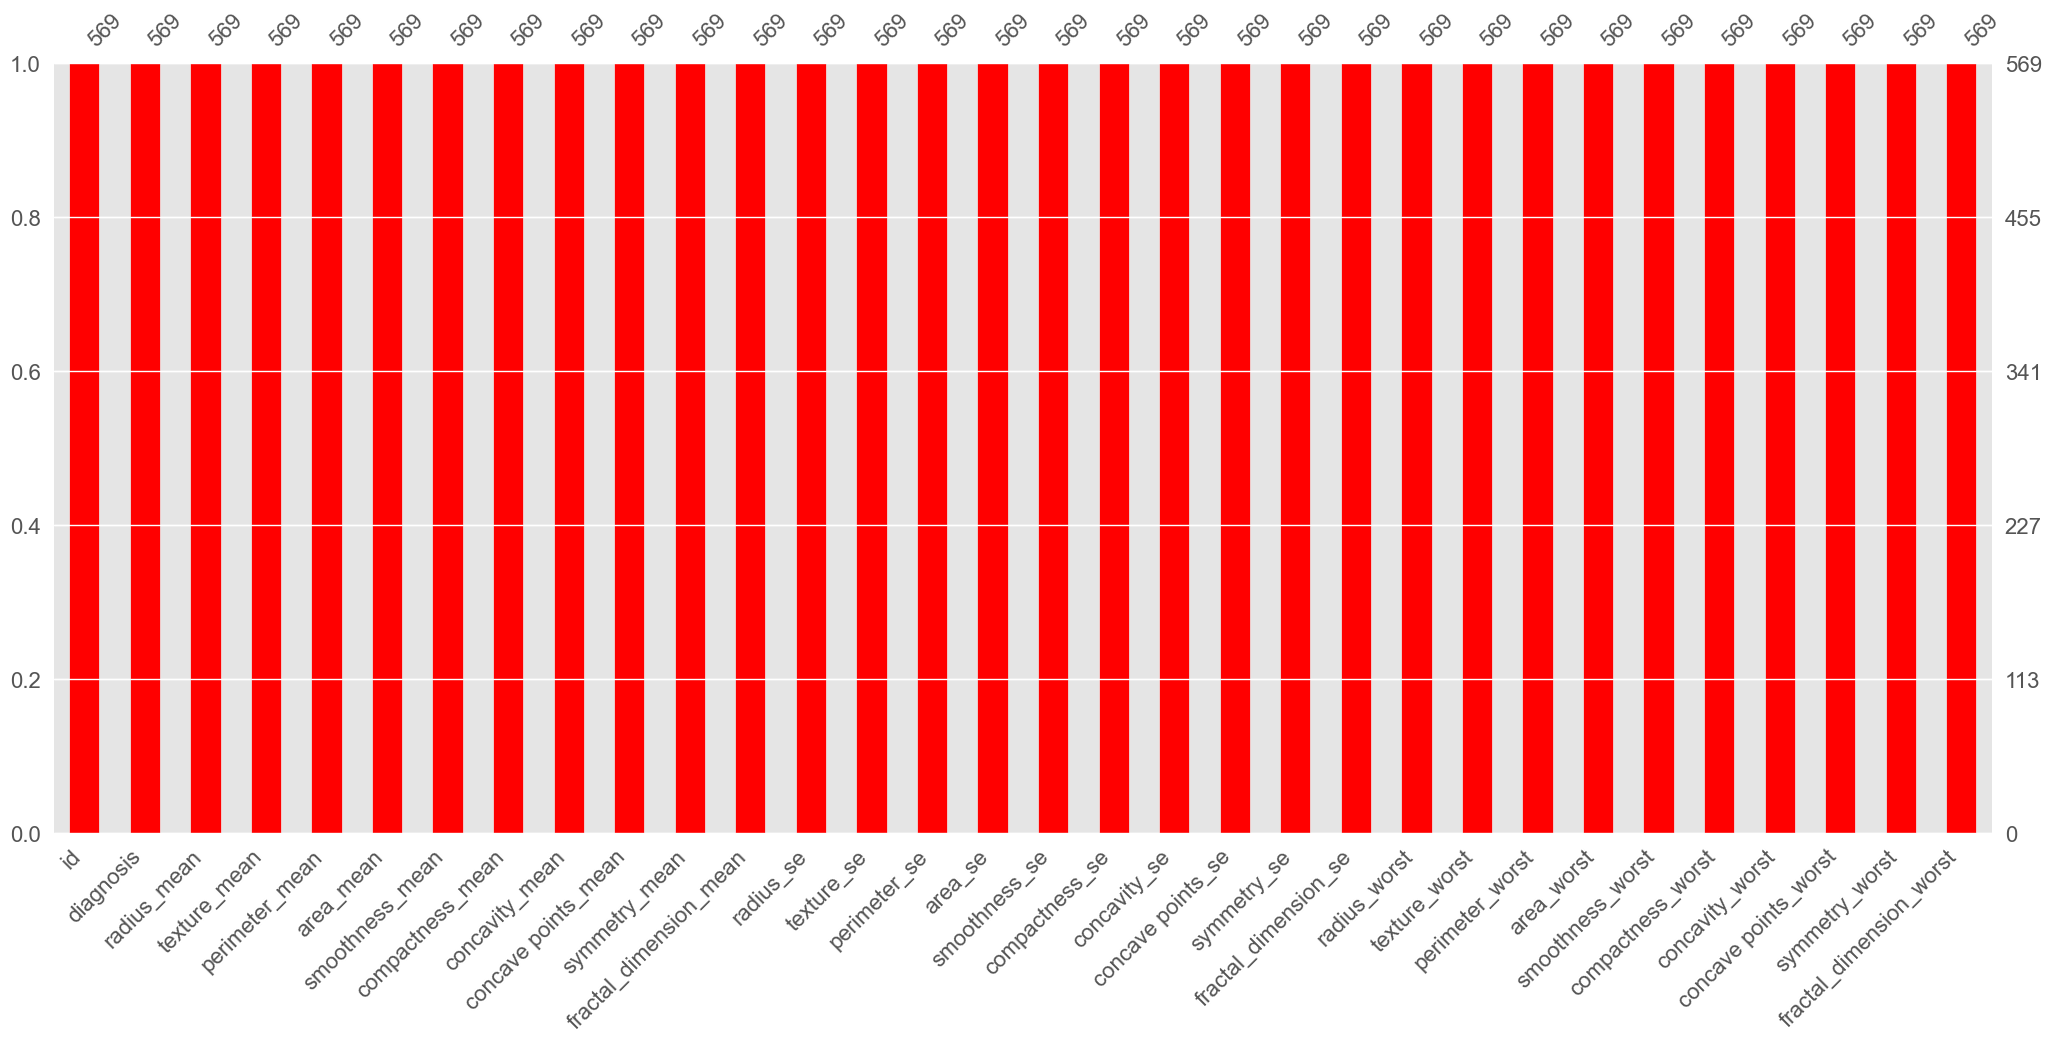

In [55]:
msno.bar(df, color="red")

## Encoding the Target Variable

The `diagnosis` column contains two classes:
- `M` = Malignant (cancerous)
- `B` = Benign (non-cancerous)

For machine learning models, the target is converted into binary values:  
- `1` for Malignant
- `0` for Benign

In [58]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val=='M' else 0)
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## Checking Class Balance
The distribution of the `diagnosis` target is visualized to determine whether the dataset is balanced or imbalanced.  

Understanding class balance helps in deciding if techniques such as resampling are required for training machine learning models.

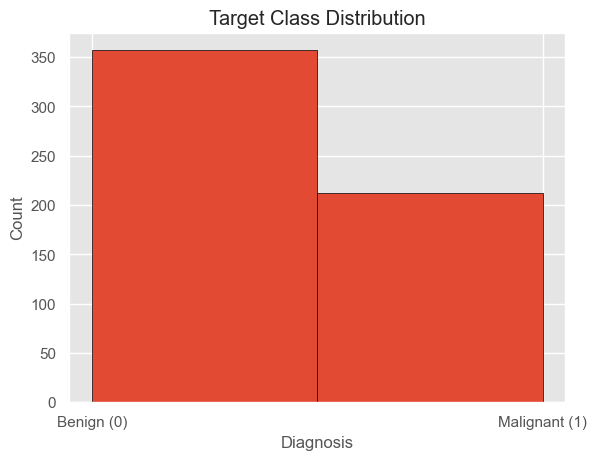

In [63]:
# Visualize class distribution
plt.hist(df['diagnosis'], bins=2,edgecolor='black')
plt.xticks([0,1], ['Benign (0)', 'Malignant (1)'])
plt.title('Target Class Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

## Feature Distribution (Exploratory Data Analysis)

KDE and histogram plots are generated for all numerical features to explore their distributions.  

- Non-feature columns (`id` and `diagnosis`) are excluded.  
- Each subplot represents one feature, arranged in a 5x6 grid.  
- This visualization helps identify **skewness, outliers, and the need for scaling or transformation**.

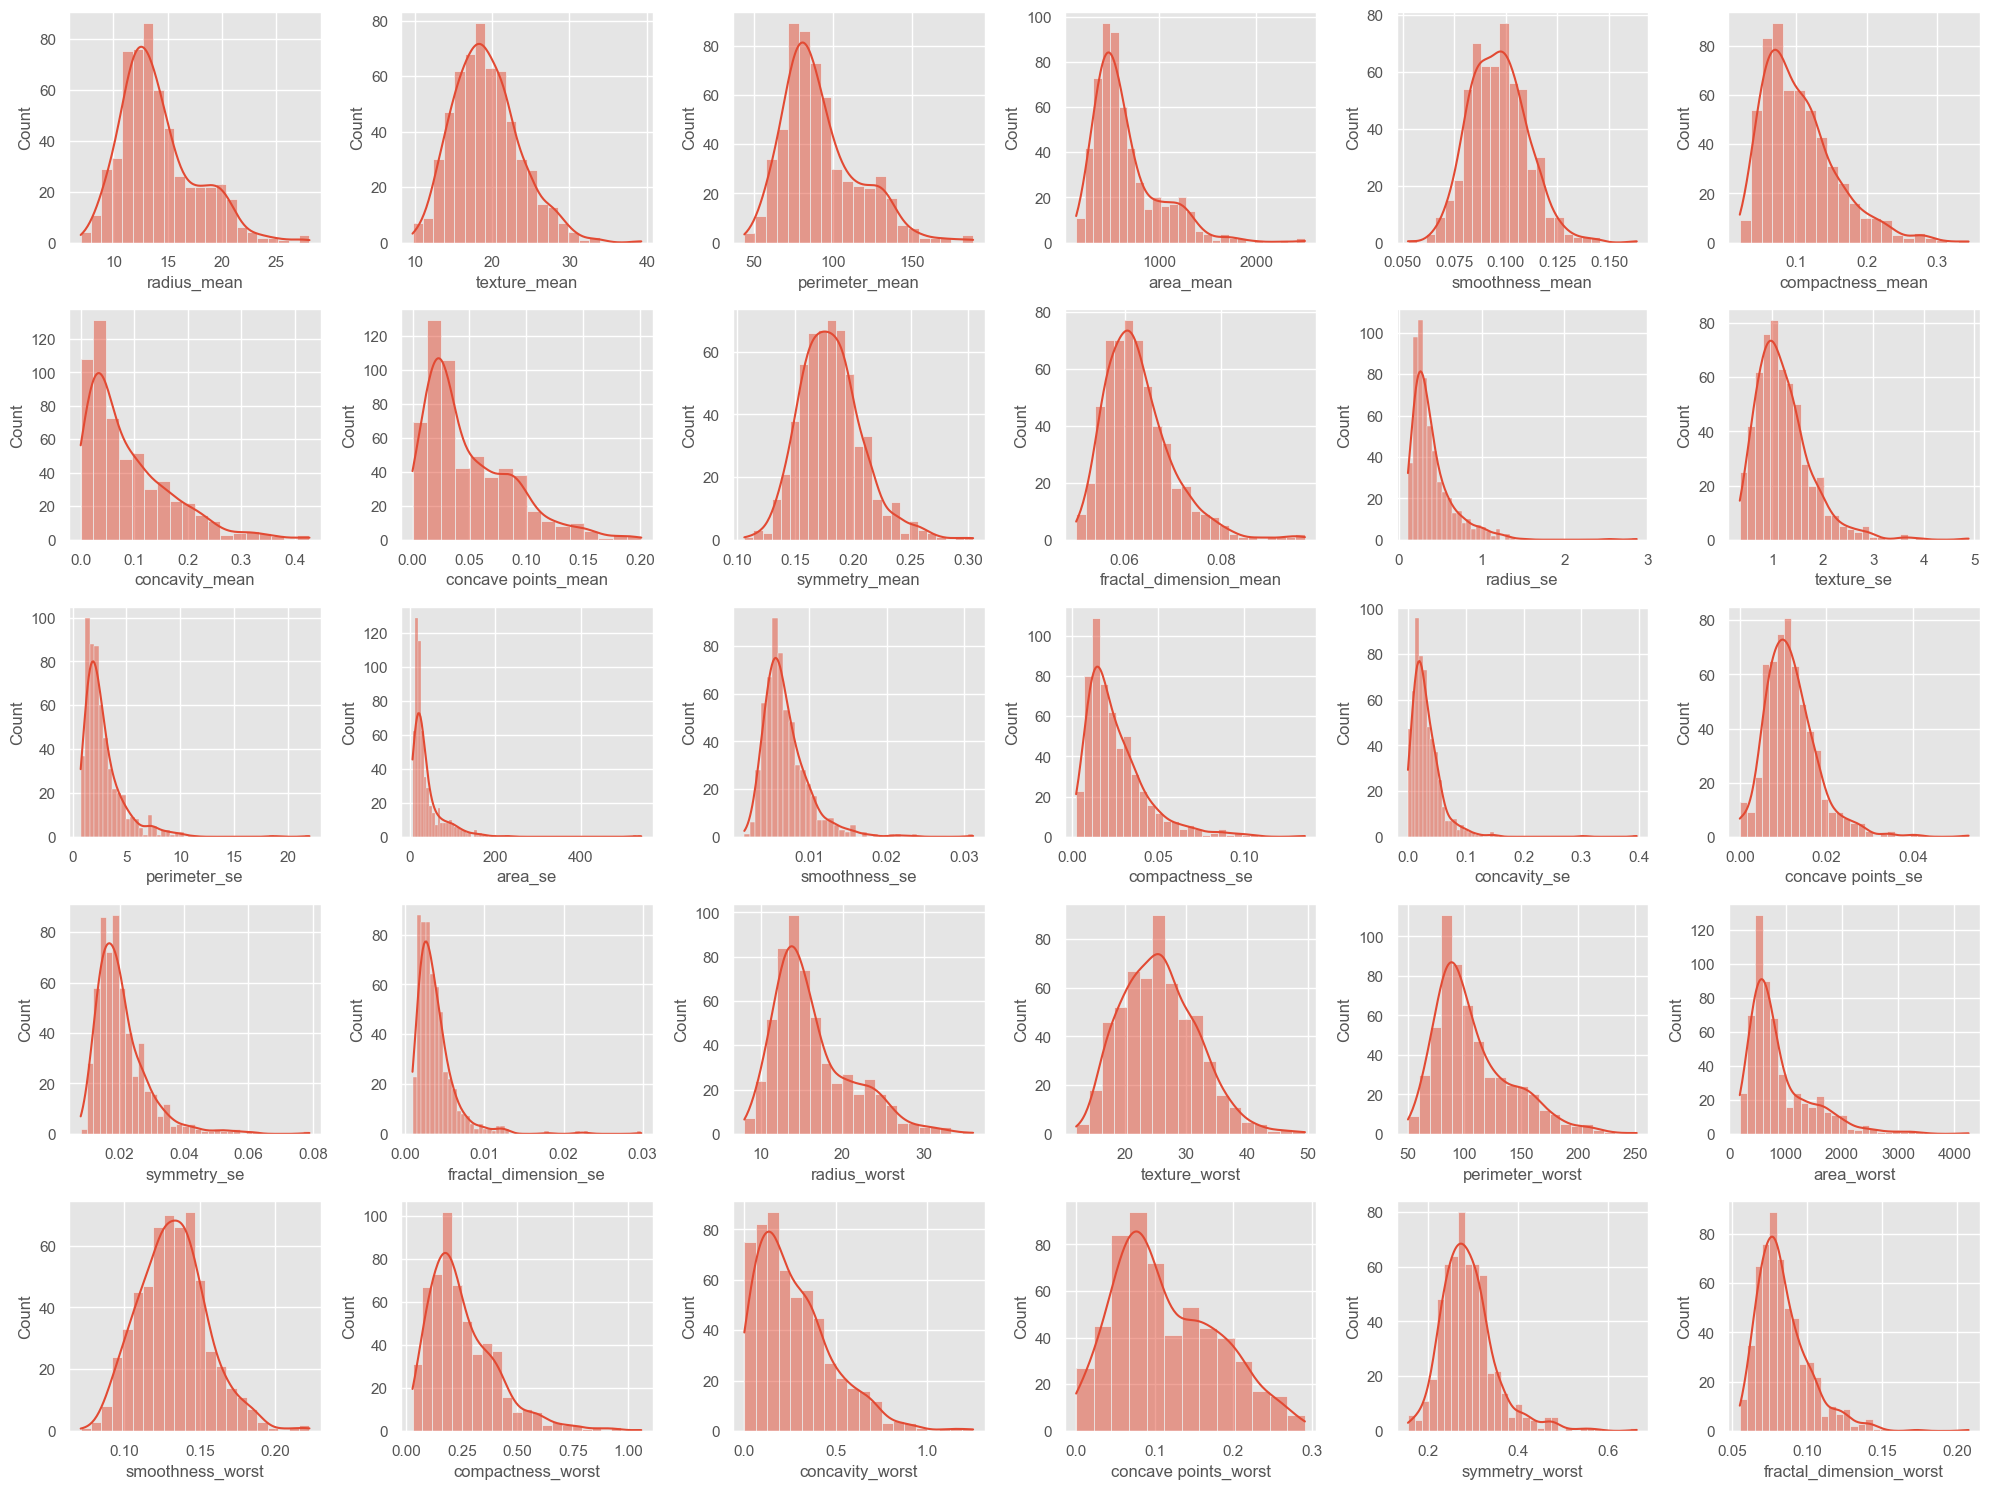

In [66]:
# Select only feature columns (exclude 'id' and target 'diagnosis')
columns_to_plot = df.drop(columns=['id', 'diagnosis'], errors='ignore').columns

plt.figure(figsize=(20,15))
plotnumber = 1

for column in columns_to_plot:
    ax = plt.subplot(5,6, plotnumber)
    sns.histplot(df[column], kde=True)
    plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

### Distribution Analysis Summary

After visualizing the distributions of all 30 numeric features:

- Most features are **right-skewed** (positively skewed).  
- The majority of tumor samples have **smaller values**, while a few have **very large values**, particularly in features such as `radius_mean`, `perimeter_mean`, and `area_mean`.  
- These high-value outliers likely correspond to **malignant tumors**, which tend to be larger and more irregular.  

**Implications for modeling:**

- Skewed features may impact algorithms sensitive to **feature scale** (e.g., KNN, Logistic Regression).  
- **Feature scaling or normalization** may be applied before training models to improve performance.


## Correlation Analysis

The pairwise correlation between numerical features is computed using `.corr()` and visualized with a **heatmap**.  

- A mask is applied to show only the **lower triangle** of the correlation matrix to reduce redundancy.  
- Annotated values (`annot=True`) display correlation coefficients up to **two decimal places**.  

**Purpose:**  
- Identify **highly correlated features**, which may indicate **multicollinearity**.  
- Multicollinearity can affect model interpretability, especially for linear models like Logistic Regression.


In [80]:
# Compute correlation matrix
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<function matplotlib.pyplot.show(close=None, block=None)>

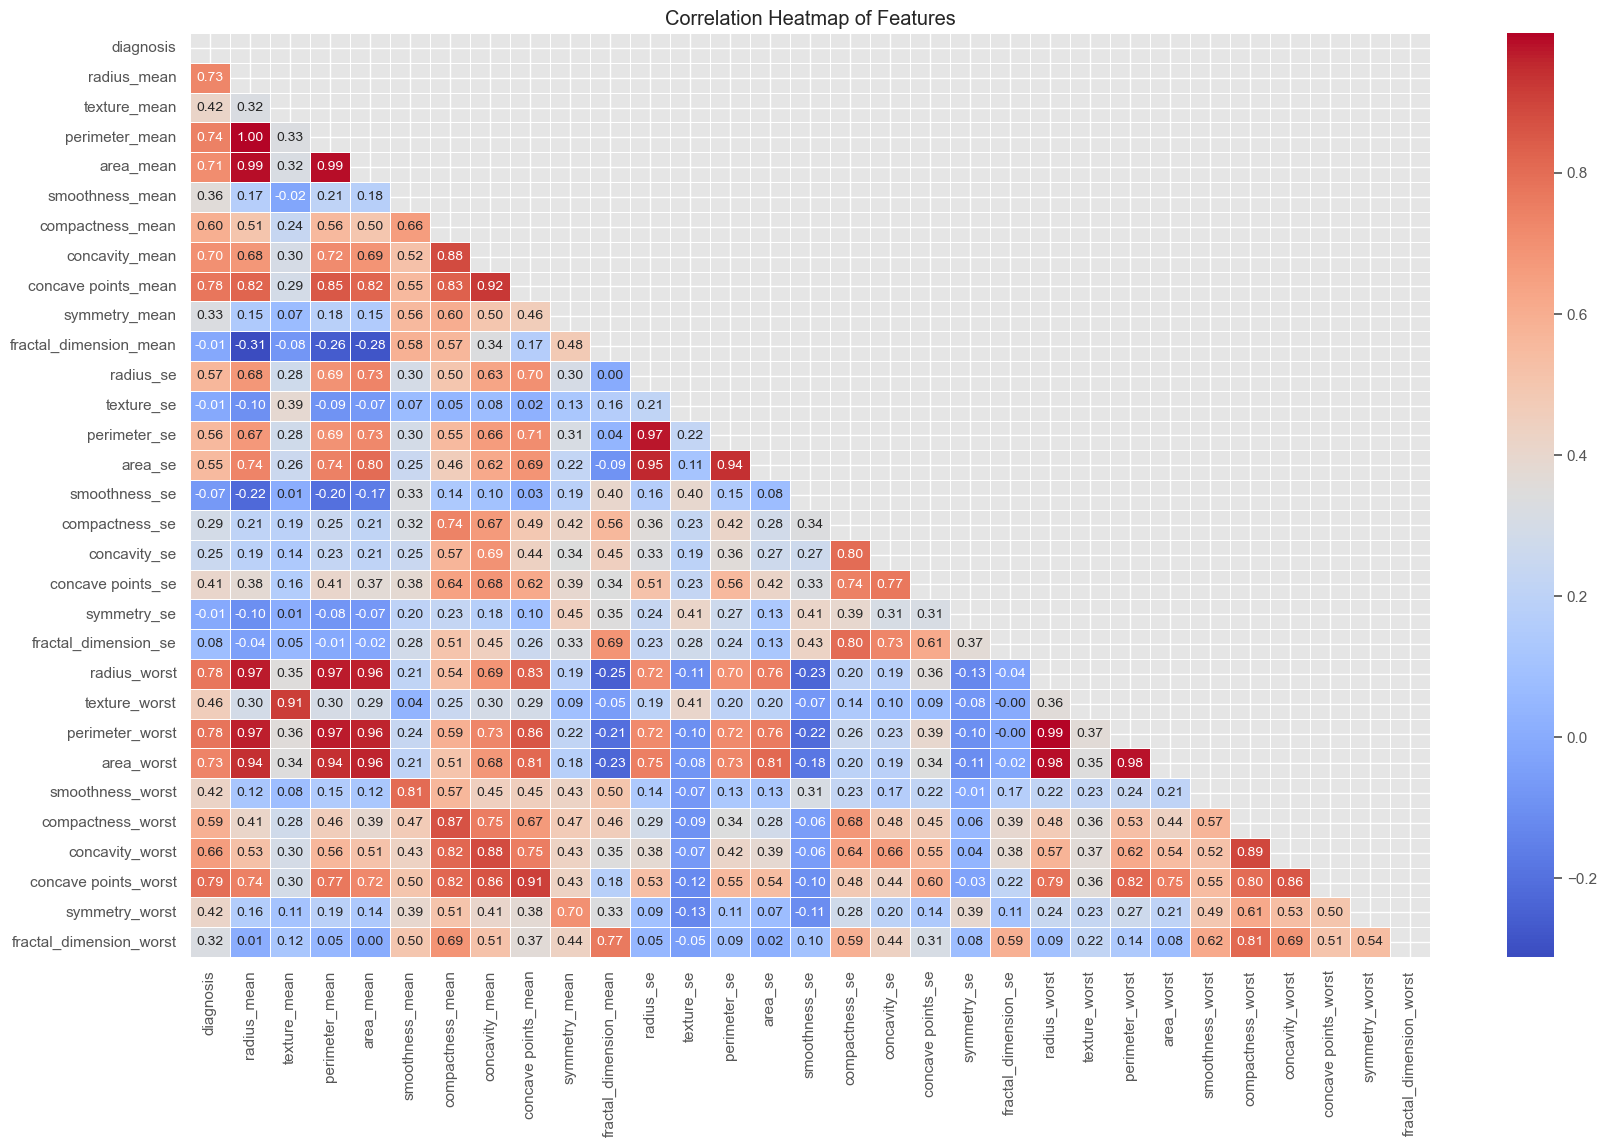

In [84]:
# Plot heatmap
plt.figure(figsize=(20,12))
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # hide upper triangle
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show

## Feature Selection

Highly correlated features can cause **multicollinearity**, which may negatively affect some machine learning models (especially linear models).  

- The correlation matrix is computed and only the **lower triangle** is considered to avoid redundancy.  
- Features with **absolute correlation > 0.92** are considered highly correlated and are removed.  
- This reduces the feature set from 32 to 23, simplifying the model and improving stability.

In [93]:
# Drop 'id' column (unique identifier)
df.drop('id', axis=1, inplace=True, errors='ignore')

# Compute absolute correlation matrix
corr_matrix = df.corr().abs()

# Mask upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# Identify highly correlated features (threshold > 0.92)
to_drop = [col for col in tri_df.columns if any(tri_df[col] > 0.92)]

# Drop highly correlated features
df = df.drop(to_drop, axis=1)

print(f"Number of remaining features: {df.shape[1]}")
print("Dropped features:", to_drop)

# Split dataset into features and target
X = df.drop('diagnosis', axis=1)  # independent features
y = df['diagnosis']               # target variable

Number of remaining features: 23
Dropped features: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst']


## Train-Test Split and Feature Scaling

1. **Train-Test Split:**  
   - The dataset is split into **training** (80%) and **testing** (20%) sets using `train_test_split`.  
   - `random_state=0` ensures reproducibility of results.

2. **Feature Scaling:**  
   - Features are standardized using `StandardScaler`, which transforms features to have:
     - Mean ≈ 0  
     - Standard deviation ≈ 1  
   - Scaling is important for algorithms sensitive to feature magnitude, such as:
     - K-Nearest Neighbors (KNN)  
     - Support Vector Machines (SVM)  
     - Logistic Regression  
   - The scaler is **fit on the training data** and then applied to both training and test sets to avoid data leakage.

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # fit scaler on training data
X_test = scaler.transform(X_test)        # transform test data

In [98]:
X_train.shape

(455, 22)

## Model Training and Evaluation

Four machine learning classifiers are trained on the processed dataset:

1. **Logistic Regression**  
2. **K-Nearest Neighbors (KNN)**  
3. **Support Vector Machine (SVM)**  
4. **Decision Tree Classifier**

**Steps for each model:**
- Train on the **standardized training data** (`X_train`, `y_train`)  
- Evaluate **accuracy on both training and test sets** (`X_train`, `X_test`)  
- A **confusion matrix** and **classification report** are displayed to assess precision, recall, and F1-score.

### Logistic Regression

Training Accuracy: 0.9890
Test Accuracy: 0.9649


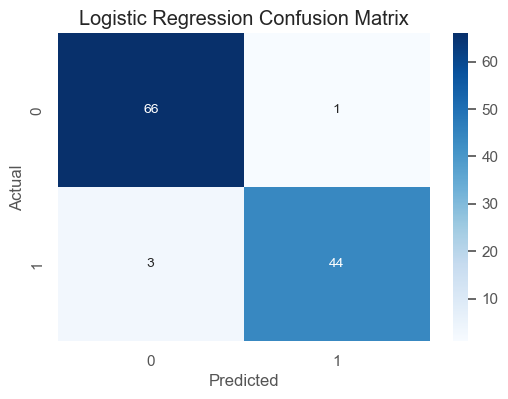

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions on test set
y_pred = log_reg.predict(X_test)

# Compute accuracy
log_reg_acc_train = accuracy_score(y_train, log_reg.predict(X_train))
log_reg_acc_test = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {log_reg_acc_train:.4f}")
print(f"Test Accuracy: {log_reg_acc_test:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

### K-Nearest Neighbors (KNN)

Training Accuracy: 0.9670
Test Accuracy: 0.9561


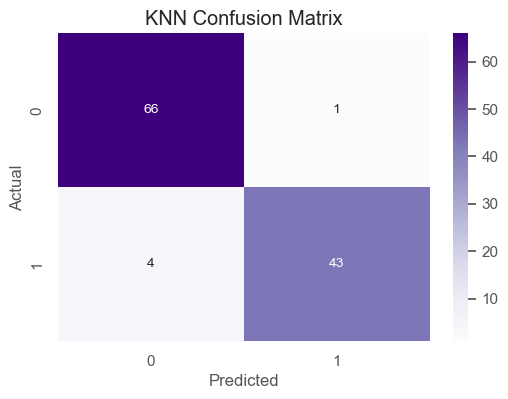

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [114]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions on test set
y_pred = knn.predict(X_test)

# Compute accuracy
knn_acc_train = accuracy_score(y_train, knn.predict(X_train))
knn_acc_test = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {knn_acc_train:.4f}")
print(f"Test Accuracy: {knn_acc_test:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

### Supported Vector Machine (SVM) Classifier

In [108]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Initialize SVM with probability estimates
svc = SVC(probability=True)

# Hyperparameter grid for tuning
parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.1, 1, 10, 15, 20]
}

# Grid search
grid_search = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 15, 'gamma': 0.01}


Training Accuracy: 0.9890
Test Accuracy: 0.9825


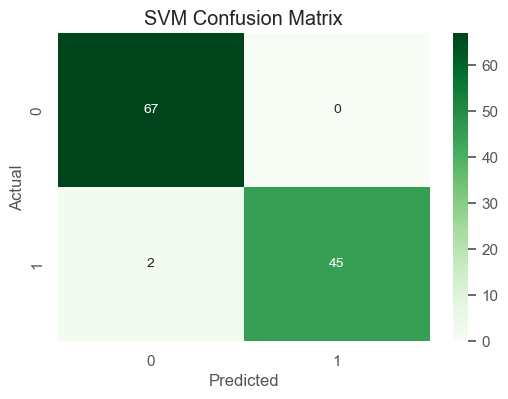

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [116]:
# Train SVM with best parameters
svc = SVC(C=best_params['C'], gamma=best_params['gamma'], probability=True)
svc.fit(X_train, y_train)

# Predictions
y_pred_svm = svc.predict(X_test)

# Accuracy
svc_acc_train = accuracy_score(y_train, svc.predict(X_train))
svc_acc_test = accuracy_score(y_test, y_pred_svm)

print(f"Training Accuracy: {svc_acc_train:.4f}")
print(f"Test Accuracy: {svc_acc_test:.4f}")

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

### Decision Trees Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier

# Initialize
dtc = DecisionTreeClassifier()

# Hyperparameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 32, 1),
    'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1),
    'splitter': ['best', 'random']
}

# Grid search
grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

print("Best Parameters:", grid_search_dt.best_params_)
print("Best CV Score:", grid_search_dt.best_score_)


Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 5, 'min_samples_split': 7, 'splitter': 'random'}
Best CV Score: 0.9582417582417584


Training Accuracy: 0.9560
Test Accuracy: 0.9825


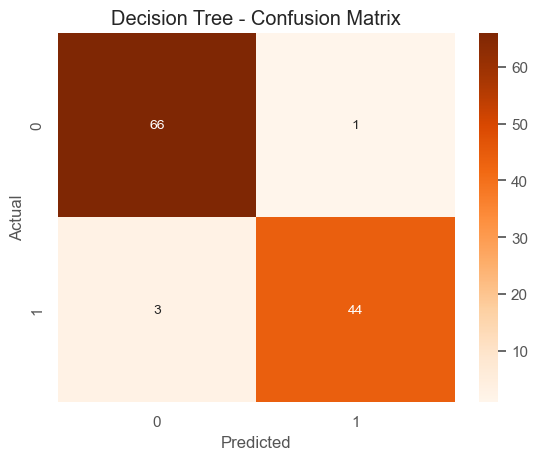

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Training Accuracy: 0.9560439560439561
Test Accuracy: 0.9649122807017544


In [127]:
# Train with best parameters
dtc = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=14, 
    min_samples_leaf=5, 
    min_samples_split=7, 
    splitter='random'
)
dtc.fit(X_train, y_train)

# Predictions
y_pred = dtc.predict(X_test)

# Accuracy
dtc_acc_train = accuracy_score(y_train, dtc.predict(X_train))
dtc_acc_test = accuracy_score(y_test, y_pred_svm)

print(f"Training Accuracy: {dtc_acc_train:.4f}")
print(f"Test Accuracy: {dtc_acc_test:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')  
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

dtc_acc_train = accuracy_score(y_train, dtc.predict(X_train))
print("Training Accuracy:", dtc_acc_train)

dtc_acc_test = accuracy_score(y_test, dtc.predict(X_test))
print("Test Accuracy:", dtc_acc_test)

### Performance Comparison

In [137]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree Classifier'],
    'Train Accuracy (%)': [100*round(log_reg_acc_train, 4), 
              100*round(knn_acc_train, 4),
              100*round(svc_acc_train, 4),
              100*round(dtc_acc_train, 4)],
    'Test Accuracy (%)': [100*round(log_reg_acc_test, 4), 
              100*round(knn_acc_test, 4),
              100*round(svc_acc_test, 4),
              100*round(dtc_acc_test, 4)]
})
models_sorted = models.sort_values(by='Train Accuracy (%)', ascending=False)
models_sorted

,Model,Train Accuracy (%),Test Accuracy (%)
0,Logistic Regression,98.9,96.49
2,SVC,98.9,98.25
1,KNN,96.7,95.61
3,Decision Tree Classifier,95.6,96.49


### Model Evaluation Summary

The table shows the train and test accuracies of four classifiers on the breast cancer dataset.  

- **SVC** achieved the highest test accuracy (**98.25%**), indicating strong generalization.  
- **Logistic Regression** also performed well with 98.9% train accuracy and 96.49% test accuracy.  
- **KNN** and **Decision Tree** had slightly lower train accuracies but still high test performance (95–96%).  

Overall, all models achieved excellent results, showing that the dataset is suitable for classification after preprocessing and feature selection.


## Conclusion
**Results:**  
- SVC achieved the highest test accuracy (98.25%), showing the best generalization.  
- All models performed well, demonstrating that the dataset is relatively easy to classify after preprocessing and feature selection.  

**Next Steps / Improvements:**  
- Experiment with more advanced models like Random Forest, which combines multiple decision trees for better predictions.   
- Tune model settings (like tree depth or number of neighbors) to find the best combination for higher accuracy.
- Create new features or modify existing ones (**feature engineering**) to help the model understand the data better.  
- Use tools that **explain the model's predictions**, showing which features influenced the decision the most. This helps make the model more understandable and trustworthy, especially in healthcare applications.
